**A.4 Automatic differentiation made easy**

If we carry out computations in PyTorch, it will build a computational graph internally by default if one of its terminal nodes has the `requires_grad` attribute set to `True`. This is useful if we want to compute gradients. Gradients are required when training neural networks via the popular `backpropagation` algorithm, which can be considered an implementation of the `chain rule` from calculus for neural networks, illustrated in figure below.

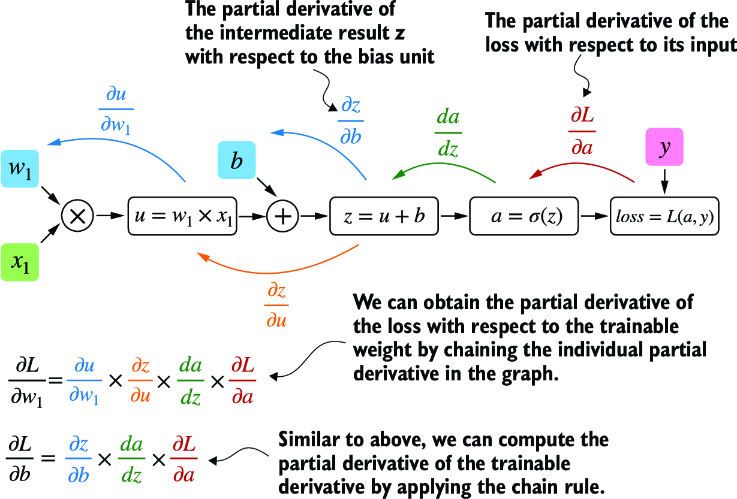

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/Data science/Build a Large Language Model (From Scratch)/Pytorch/images/loss_gradients.png')


<img src='https://drive.google.com/file/d/1tURljwdDHNt7kQzeNy3CRVhZcSDRSQaz/view?usp=drive_link' alt=" The most common way of computing the loss gradients in a computation graph involves applying the chain rule from right to left, also called reverse-model automatic differentiation or backpropagation. We start from the output layer (or the loss itself) and work backward through the network to the input layer. We do this to compute the gradient of the loss with respect to each parameter (weights and biases) in the network, which informs how we update these parameters during training."/>


Partial derivatives and gradients

Figure above shows partial derivatives, which measure the rate at which a function changes with respect to one of its variables. A `gradient` is a vector containing all of the partial derivatives of a multivariate function, a function with more than one variable as input.

If you are not familiar with or don’t remember the partial derivatives, gradients, or chain rule from calculus, don’t worry. On a high level, all you need to know for this book is that the `chain rule` is a way to compute gradients of a loss function given the model’s parameters in a computation graph. This provides the information needed to update each parameter to minimise the loss function, which serves as a proxy for measuring the model’s performance using a method such as `gradient descent`.

How is this all related to the automatic differentiation (autograd) engine, the second component of the PyTorch library mentioned earlier?

PyTorch’s autograd engine constructs a computational graph in the background by tracking every operation performed on tensors. Then, calling the `grad` function, we can compute the gradient of the loss concerning the model parameter `w1`, as shown in the following listing.

In [4]:
# Computing gradients via autograd
import torch
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = w1 * x1 + b
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

# `grad(loss, w1)` computes the gradient of the loss with respect to the
# `w1`. This will tell you how much the loss would change if you changed `w1` by a
# small amount. PyTorch tracks the operations involving w1, and when you call
# `grad()`, it computes the gradient

# `retain_graph=True`: This argument is important because you're computing
# multiple gradients in a single backward pass. Normally, after calling
# `.backward()`, the computation graph is freed to save memory. By using
# `retain_graph=True`, you're telling PyTorch to retain the graph for future
# gradient computations.

# Similarly, `grad(loss, b)` computes the gradient of the loss with respect to
# the bias `b`.

grad_l_w1 = grad(loss, w1, retain_graph=True)
grad_l_b = grad(loss, b, retain_graph=True)

# The resulting values of the loss given the model’s parameters are
print(f" grad_l_w1: {grad_l_w1}")
print(f" grad_l_b: {grad_l_b}")

 grad_l_w1: (tensor([-0.0898]),)
 grad_l_b: (tensor([-0.0817]),)


Here, we have been using the grad function manually, which can be useful for experimentation, debugging, and demonstrating concepts. But, in practice, PyTorch provides even more high-level tools to automate this process. For instance, we can call `.backward` on the loss, and PyTorch will compute the gradients of all the leaf nodes in the graph, which will be stored via the tensors’ `.grad` attributes:

In [5]:
loss.backward()
print(f" grad_l_w1: {w1.grad}")
print(f" grad_l_b: {b.grad}")

 grad_l_w1: tensor([-0.0898])
 grad_l_b: tensor([-0.0817])


PyTorch takes care of the calculus for us via the `.backward` method—we won’t need to compute any derivatives or gradients by hand.